# Understanding Classification

So far, all the predictive algorithms we have used have been used with the objective of covering regression. Regression refers to making continuous numerical predictions based on data that we have. We might however be interested not in knowing a specific value from prediction, but about if our data belongs to a certain class.

For example, we'd like to know if a picture depicts a cat, dog, tree or some other object based on the information given in the pixels. These type of problems are known as classification problems. Models use prediction to calculate the likelihood the information fed to them belongs to a specific class instead of predicting a specific value of the variable itself. 

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline

In [2]:
#Let's get the Telco User churn dataset

df = pd.read_csv("User-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Could we determine based on the data that we have if a person will have a churn code of yes? We will start by defining all of our categorical variables as such and move from then on


In [3]:
#Example with gender

df.gender = pd.Categorical(df.gender)
df['gender_code'] = df.gender.cat.codes
df[['gender','gender_code']].head()

,gender,gender_code
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Female,0


This type of variable encoding is known as "one-hot encoding" or dummy variables. We will go ahead and turn all of these variables into dummies, using the method above. Note that the code I am using up to this point (and for the next few cells for preprocessing) is coming directly from [here](https://github.com/spierre91/medium_code/blob/45bde0c3a960a60a87fe45935a86fd7bc25c8441/keras_classification.py)  and is the work of Pierre Sadrach.

In [4]:
df.SeniorCitizen = pd.Categorical(df.SeniorCitizen)
df['SeniorCitizen_code'] = df.SeniorCitizen.cat.codes


df.PhoneService = pd.Categorical(df.PhoneService)
df['PhoneService_code'] = df.PhoneService.cat.codes

df.MultipleLines = pd.Categorical(df.MultipleLines)
df['MultipleLines_code'] = df.MultipleLines.cat.codes

df.InternetService = pd.Categorical(df.InternetService)
df['InternetService_code'] = df.InternetService.cat.codes


df.Partner = pd.Categorical(df.Partner)
df['Partner_code'] = df.Partner.cat.codes

df.Dependents = pd.Categorical(df.Dependents)
df['Dependents_code'] = df.Dependents.cat.codes

df.OnlineSecurity = pd.Categorical(df.OnlineSecurity)
df['OnlineSecurity_code'] = df.OnlineSecurity.cat.codes

df.OnlineBackup = pd.Categorical(df.OnlineBackup)
df['OnlineBackup_code'] = df.OnlineBackup.cat.codes

df.DeviceProtection = pd.Categorical(df.DeviceProtection)
df['DeviceProtection_code'] = df.DeviceProtection.cat.codes


df.TechSupport = pd.Categorical(df.TechSupport)
df['TechSupport_code'] = df.TechSupport.cat.codes

df.StreamingTV = pd.Categorical(df.StreamingTV)
df['StreamingTV_code'] = df.StreamingTV.cat.codes


df.StreamingMovies = pd.Categorical(df.StreamingMovies)
df['StreamingMovies_code'] = df.StreamingMovies.cat.codes

df.Contract = pd.Categorical(df.Contract)
df['Contract_code'] = df.Contract.cat.codes

df.PaperlessBilling = pd.Categorical(df.PaperlessBilling)
df['PaperlessBilling_code'] = df.PaperlessBilling.cat.codes

df.PaymentMethod = pd.Categorical(df.PaymentMethod)
df['PaymentMethod_code'] = df.PaymentMethod.cat.codes

df.Churn = pd.Categorical(df.Churn)
df['Churn_code'] = df.Churn.cat.codes

In [5]:
features = ['gender_code', 'SeniorCitizen_code', 'PhoneService_code', 'MultipleLines_code', 
                 'InternetService_code', 'Partner_code', 'Dependents_code', 'PaymentMethod_code', 
                 'PaymentMethod_code', 'PaperlessBilling_code','Contract_code', 'StreamingMovies_code',
                 'StreamingTV_code', 'TechSupport_code', 'DeviceProtection_code', 'OnlineBackup_code',
                 'OnlineSecurity_code', 'Dependents_code', 'Partner_code','tenure', 'MonthlyCharges']


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,
                               test_size=0.2, 
                               random_state=42,
                               shuffle=True)


## K Nearest neighbors

The logic of K nearest neighbors is similar. But instead of assigning averages of our y variable since this one is categorical, we give our predictions the one that is the most frequenet.

In [7]:
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [8]:
#For now let's start with a 5 neighbor KNN

knn_5=knnc(n_neighbors=5).fit(y=train['Churn_code'],
                       X=train[features])

In [9]:
#we need to do things a bit differently. First let's get the predictions

k5trainpred=knn_5.predict(train[features])

k5trainpred

array([0, 0, 1, ..., 0, 1, 0], dtype=int8)

## Evaluating a classification model

We should know how well we are doing to decide if we are going to change our hyperpameters and see what we obtain


In [10]:
print(classification_report(y_pred=k5trainpred, y_true=train['Churn_code']))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4138
           1       0.72      0.65      0.68      1496

    accuracy                           0.84      5634
   macro avg       0.80      0.78      0.79      5634
weighted avg       0.83      0.84      0.84      5634



Ok... what are these numbers? These all come from the "Confusion matrix"

In [11]:
pd.DataFrame(confusion_matrix(y_pred=k5trainpred, y_true=train['Churn_code']),
             index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1'])

,pred:0,pred:1
true:0,3757,381
true:1,529,967


In the data frame above, the row names are the number  of true zeros and 1s in the data, and the columns have the predictions. The values then tell you what number was at the interesection of both situations.

For example, there were 3757 observations that were true zeros that were predicted as zero. In turn, there are 529 true observations of 1s that were predicted as zero.


### Precision


Examine the number below that I built from the confusion matrix and let's analyze what it represents

In [12]:

(3757)/(3757+529)

0.8765748950069996

As you can see, the numbers 3757 and 529 belong in the first column of the matrix. These are all observations that were predicted to be zero. Their sum is in the denominator. The numerator is the ones that were correctly predicted to be zero.

Precision then denotes the proportion of correct predictions of a class when we take into account all the predictions of that class.

### Recall

Similarly, analyze this number

In [13]:
3757/(3757+381)

0.9079265345577574

Now look at the first row of the confusion matrix! This is the proportion of true zero label observations that was predicted correctly!


In summary, we have this:


![Precision vs Recall](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png)



## F1 score

The F1 score is a score that balances both precision and recall


$$F1=\frac{2}{precision^{-1}+recall^{-1}}$$


Which we can think of a "balance" of precision and recall. We generally prioritize precision or recall depending on what is our goal for prediction.


One more number:

## Accuracy

In [14]:
(3757+967)/(3757+967+381 +529)

0.8384806531771388

This is the proportion of correctly predicted observations across ALL


Let's call our report once more:

In [15]:
print(classification_report(y_pred=k5trainpred, y_true=train['Churn_code']))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4138
           1       0.72      0.65      0.68      1496

    accuracy                           0.84      5634
   macro avg       0.80      0.78      0.79      5634
weighted avg       0.83      0.84      0.84      5634



It seems that overall we have done pretty well! But what if we tried the test data?

In [16]:
k5testpred=knn_5.predict(test[features])


In [17]:
print(classification_report(y_pred=k5testpred, y_true=test['Churn_code']))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.57      0.49      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



We have not done too poorly! Depending on what is our target, we could do the same exercise we did for regression and fine a number of neighbors that we'd like. For the sake of simplicity, let's use accuracy.

We can call accuracy directly from python

In [18]:
accuracy_score(y_pred=k5testpred, y_true=test['Churn_code'])

0.7672107877927609

In [19]:
# Training scores

scoretrain=[accuracy_score(y_pred=knnc(n_neighbors=i).fit(y=train['Churn_code'],
                       X=train[features]).predict(train[features]),
                          y_true=train['Churn_code']) for i in list(range(5, 100, 2))]




In [20]:
trainscore=pd.DataFrame(scoretrain, columns=["accuracy"])

trainscore['datsplit']='Training'
trainscore['neighbors']=list(range(5, 100, 2))

In [21]:
trainscore.head()

,accuracy,datsplit,neighbors
0,0.838481,Training,5
1,0.831913,Training,7
2,0.824104,Training,9
3,0.816471,Training,11
4,0.813454,Training,13


In [22]:
scoretest=[accuracy_score(y_pred=knnc(n_neighbors=i).fit(y=train['Churn_code'],
                       X=train[features]).predict(test[features]),
                          y_true=test['Churn_code']) for i in list(range(5, 100, 2))]



In [23]:
testscore=pd.DataFrame(scoretest, columns=["accuracy"])

testscore['datsplit']='Testing'
testscore['neighbors']=list(range(5, 100, 2))

In [24]:
testscore.head()

,accuracy,datsplit,neighbors
0,0.767211,Testing,5
1,0.771469,Testing,7
2,0.787793,Testing,9
3,0.790632,Testing,11
4,0.792761,Testing,13


In [25]:
score_df=pd.concat([trainscore,testscore], axis=0)



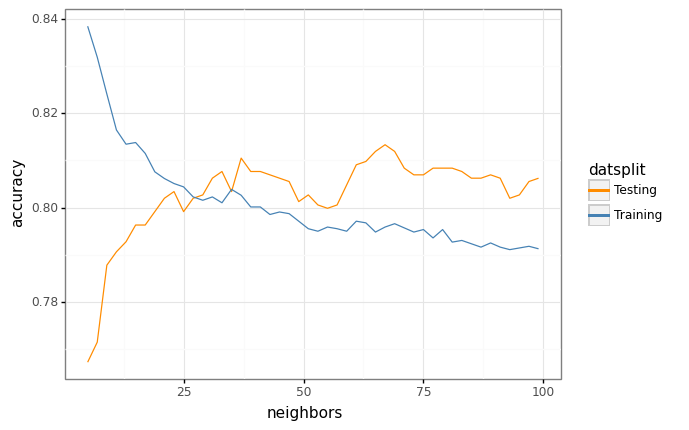

<ggplot: (8787160293407)>

In [26]:
(ggplot(score_df, aes(x='neighbors', y='accuracy', color='datsplit'))+
geom_line()+
scale_color_manual(values=['darkorange', 'steelblue'])+
 theme_bw()
)

Maybe we should be using something else?



In [27]:
from sklearn.metrics import f1_score

In [28]:
# Training scores

f1train=[f1_score(y_pred=knnc(n_neighbors=i).fit(y=train['Churn_code'],
                       X=train[features]).predict(train[features]),
                          y_true=train['Churn_code']) for i in list(range(5, 100, 2))]



In [29]:
trainf1=pd.DataFrame(f1train, columns=["F1score"])

trainf1['datsplit']='Training'
trainf1['neighbors']=list(range(5, 100, 2))

In [30]:
f1test=[f1_score(y_pred=knnc(n_neighbors=i).fit(y=train['Churn_code'],
                       X=train[features]).predict(test[features]),
                          y_true=test['Churn_code']) for i in list(range(5, 100, 2))]



In [31]:
testf1=pd.DataFrame(f1test, columns=["F1score"])

testf1['datsplit']='Testing'
testf1['neighbors']=list(range(5, 100, 2))

In [32]:
f1_df=pd.concat([trainf1,testf1], axis=0)


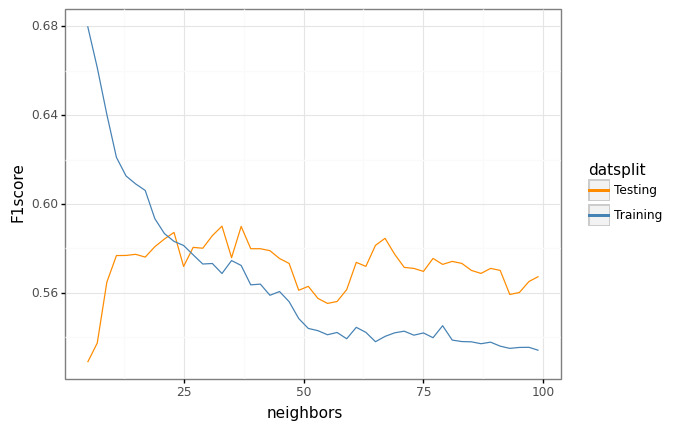

<ggplot: (8787180485786)>

In [33]:
(ggplot(f1_df, aes(x='neighbors', y='F1score', color='datsplit'))+
geom_line()+
scale_color_manual(values=['darkorange', 'steelblue'])+
 theme_bw()
)

OK, so maybe it is harder to think about these methods like this. But we still managed to have some idea of what a good model is. We will try some other techniques for analyzing it later. 


## Random Forest Classifiers

In [34]:
from sklearn.ensemble import RandomForestClassifier as rf_clf


The scikit learn defaults are 100 estimators. We will use the defaults for now to show something interesting about the classifiers that use the more complicated algorithms. 

In [35]:
#our class predictions

rftrainpred=rf_clf().fit(y=train['Churn_code'],
                       X=train[features]).predict(train[features])

rftrainpred

array([0, 0, 1, ..., 0, 1, 0], dtype=int8)

In [36]:
#predicting probabilities

rftrainpredprob=rf_clf().fit(y=train['Churn_code'],
                       X=train[features]).predict_proba(train[features])

rftrainpredprob

array([[0.99, 0.01],
       [0.97, 0.03],
       [0.17, 0.83],
       ...,
       [0.98, 0.02],
       [0.03, 0.97],
       [1.  , 0.  ]])

In [37]:
rfdf=pd.DataFrame()

rfdf['class_predicted']=rftrainpred

rfdf['prob_0'], rfdf['prob_1']=rftrainpredprob.T

In [38]:
rfdf.dropna(inplace=True)

In [39]:
rfdf.head()

,class_predicted,prob_0,prob_1
0,0,0.99,0.01
1,0,0.97,0.03
2,1,0.17,0.83
3,1,0.18,0.82
4,0,0.96,0.04


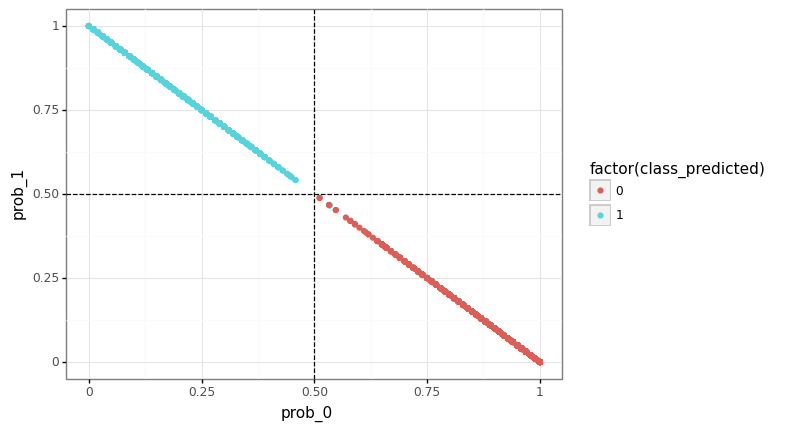

<ggplot: (8787160306553)>

In [40]:
(ggplot(rfdf, aes(x='prob_0', y='prob_1', color='factor(class_predicted)'))+
geom_point()+
geom_hline(yintercept=0.5, linetype='dashed')+
 geom_vline(xintercept=0.5, linetype='dashed')+
 theme_bw()
)

As you might notice, there seems to be a split at 0.5. 

A lot of classification models decide on a class at that threshold. If the probability of a class is above 0.5 then that is the class that is assigned. 

Let's build a classification report for this, but let's do it from the dataframe we used to make the plot. We might want to add a column that has the true churn codes

In [41]:
rfdf['True']=train['Churn_code']

In [42]:
rfdf.dropna(inplace=True)

In [43]:
print(classification_report(y_pred=rfdf['class_predicted'], y_true=rfdf['True'].astype(int)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3314
           1       0.28      0.27      0.27      1193

    accuracy                           0.62      4507
   macro avg       0.51      0.51      0.51      4507
weighted avg       0.62      0.62      0.62      4507



In [44]:
#Let's lower the threshold for predicting 1 to 0.25

rfdf['pred1_25']=np.where(rfdf['prob_1']>0.25, 1,0)

In [45]:
rfdf.head()

,class_predicted,prob_0,prob_1,True,pred1_25
0,0,0.99,0.01,0.0,0
1,0,0.97,0.03,0.0,0
2,1,0.17,0.83,1.0,1
3,1,0.18,0.82,0.0,1
4,0,0.96,0.04,1.0,0


In [46]:
print(classification_report(y_pred=rfdf['pred1_25'], y_true=rfdf['True'].astype(int)))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      3314
           1       0.27      0.31      0.29      1193

    accuracy                           0.60      4507
   macro avg       0.51      0.51      0.51      4507
weighted avg       0.62      0.60      0.61      4507



Recall has improved!

Let's now plot this

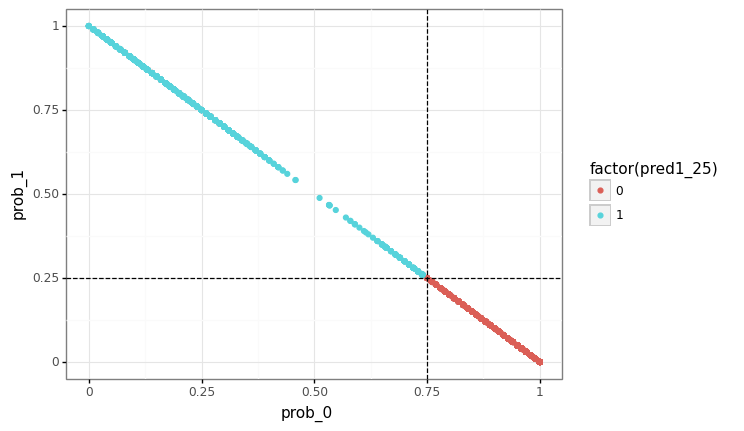

<ggplot: (8787160560836)>

In [47]:
(ggplot(rfdf, aes(x='prob_0', y='prob_1', color='factor(pred1_25)'))+
geom_point()+
geom_hline(yintercept=0.25, linetype='dashed')+
 geom_vline(xintercept=0.75, linetype='dashed')+
 theme_bw()
)